# 2 Exploratory Data Analysis <a id="eda"></a>

<a id="contents"></a>
## 2.1 Table of Contents

- [2 Exploratory Data Analysis](#eda)
  - [2.1 Contents](#contents)
  - [2.2 Introduction](#introduction)
      - [2.2.1 Objective](#objective)
  - [2.3 Imports](#imports)
  - [2.4 Load the Data](#dataload)
  - [2.5 Explore the Data](#explore_data)
      - [2.5.1 Summary Statistics and Percentiles](#summary_stats)
      - [2.5.2 Drop Unnecessary Columns](#drop_columns)
      - [2.5.3 Outliers](#outliers)
      - [2.5.4 Distributions](#distributions)
      - [2.5.5 Feature Engineering](#feature_engineering)
  - [2.6 Visualizations](#visualizations)
      - [2.6.1 Fraud Instances by Categories](#fraud_by_category)
      - [2.6.2 Pair Plot of Numerical Features by Fraud Status](#pair_plot)
      - [2.6.3 Density Plots of Numerical Features by Fraud Status](#density_plots)
      - [2.6.4 Feature Correlation Heatmap](#heatmap)
  - [2.7 Summary](#summary)

## 2.2 Introduction <a id="introduction"></a>

**Problem**: With the rapid growth of the Metaverse, financial transactions in virtual environments have increased significantly. However, this also introduces new avenues for fraudulent transactions. Unlike traditional banking systems, transactions in the Metaverse lack stringent regulatory frameworks, making them prone to fraud. 

This project aims to develop a predictive model that identifies and flags potential fraudulent transactions within the Metaverse.

### 2.2.1 Objective <a id="objective"></a>

We'll leverage visualizations to identify potential outliers and feature correlations, as well as generate statistical summaries, the nature of distributions for each variable, and how we might handle any data cleaning or transformation that's necessary. We're looking at data for all of 2022. 

## 2.3 Imports <a id="imports"></a>

In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import matplotlib.ticker as tick

from IPython import display
from ipywidgets import interact, widgets
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

## 2.4 Load the Data <a id="dataload"></a>

In [23]:
df = pd.read_csv('/Users/joshuabe/Downloads/Capstone 3 - Metaverse Fraud Prediction/metaverse_transactions_dataset_cleaned.csv')

In [24]:
df.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,day_of_week,month
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk,0,4
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk,1,6
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk,1,1
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk,2,6
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk,4,2


## 2.5 Explore the Data <a id="explore_data"></a>

**Overview of Column Meanings**: 

- **Timestamp**: Date and time of the transaction.
- **Hour of Day**: Hour part of the transaction timestamp.
- **Sending Address**: Blockchain address of the sender.
- **Receiving Address**: Blockchain address of the receiver.
- **Amount**: Transaction amount in a simulated currency.
- **Transaction Type**: Categorization of the transaction (e.g., transfer, sale, purchase, scam, phishing).
- **Location Region**: Simulated geographical region of the transaction.
- **IP Prefix**: Simulated IP address prefix for the transaction.
- **Login Frequency**: Frequency of login sessions by the user, varying by age group.
- **Session Duration**: Duration of activity sessions in minutes.
- **Purchase Pattern**: Behavioral pattern of purchases (e.g., focused, random, high-value).
- **Age Group**: Categorization of users into new, established, and veteran based on their activity history.
- **Risk Score**: Calculated risk score based on transaction characteristics and user behavior.
- **Anomaly**: Risk level assessment (e.g., high_risk, moderate_risk, low_risk).

### 2.5.1 Summary Statistics and Percentiles <a id="summary_stats"></a>

In [25]:
df.describe(percentiles=[.25, .5, .75, .9]).T

,count,mean,std,min,25%,50%,75%,90%,max
hour_of_day,78600.0,11.532634,6.935897,0.00,6.000000,12.0000,18.000000,21.000000,23.000000
amount,78600.0,502.574903,245.898146,0.01,331.319966,500.0295,669.528311,822.188727,1557.150905
ip_prefix,78600.0,147.644430,69.388143,10.00,172.000000,172.1600,192.000000,192.168000,192.168000
login_frequency,78600.0,4.178702,2.366038,1.00,2.000000,4.0000,6.000000,8.000000,8.000000
session_duration,78600.0,69.684606,40.524476,20.00,35.000000,60.0000,100.000000,136.000000,159.000000
risk_score,78600.0,44.956722,21.775365,15.00,26.250000,40.0000,52.500000,70.875000,100.000000
day_of_week,78600.0,3.003372,1.998823,0.00,1.000000,3.0000,5.000000,6.000000,6.000000
month,78600.0,6.530153,3.453638,1.00,4.000000,7.0000,10.000000,11.000000,12.000000


Summary of numeric columns: 

- **Hour of Day**: Transactions are recorded throughout the day, ranging from 0 to 23 hours.
- **Amount**: The transaction amounts vary significantly, ranging from as low as 0.01 to 1557.15 in the simulated currency, with a mean around 502.57.
- **IP Prefix**: This ranges from 10 to 192.168, suggesting some variability in the network addresses.
- **Login Frequency**: Users log in between 1 to 8 times, with an average frequency of about 4.
- **Session Duration**: Session times range from 20 to 159 minutes, with an average of approximately 70 minutes.
- **Risk Score**: The risk scores range from 15 to 100, with a mean score of around 45.

### 2.5.2 Drop Unnecessary Columns <a id="drop_columns"></a>

We have a few features that seem to be redundant: transaction type and risk score, as well as anomaly. Let's see how much our risk score relates to transaction type. 

In [26]:
df.groupby('transaction_type').agg({'risk_score': 'mean'})

,risk_score
transaction_type,
phishing,100.000000
purchase,33.086762
sale,56.493773
scam,96.194733
transfer,29.800563


As expected, risk score and transaction type are highly related, so we can drop one of these values. Let's check the anomaly field. 

In [27]:
# Pivot the table to show counts of each anomaly level per transaction type
anomaly_counts = df.pivot_table(index='transaction_type', columns='anomaly', aggfunc='size', fill_value=0)

anomaly_counts

anomaly,high_risk,low_risk,moderate_risk
transaction_type,,,
phishing,2546,0,0
purchase,0,24940,0
sale,0,16429,8611
scam,3949,0,0
transfer,0,22125,0


Again, anomaly and transaction type are highly related, since the transaction types of phishing and scamming exclusively show as high risk. We'll feature engineer a binary field "fraud" to use as our output, and drop transaction_type, risk_score, and anomaly later after visualization. We might even engineer our own risk score and/or anomaly field later. 

In [28]:
df['fraud'] = df['transaction_type'].isin(['phishing', 'scam'])

### 2.5.3 Outliers <a id="outliers"></a>

We'll want to check the dataset for outliers, so we'll create some boxplots to examine this. 

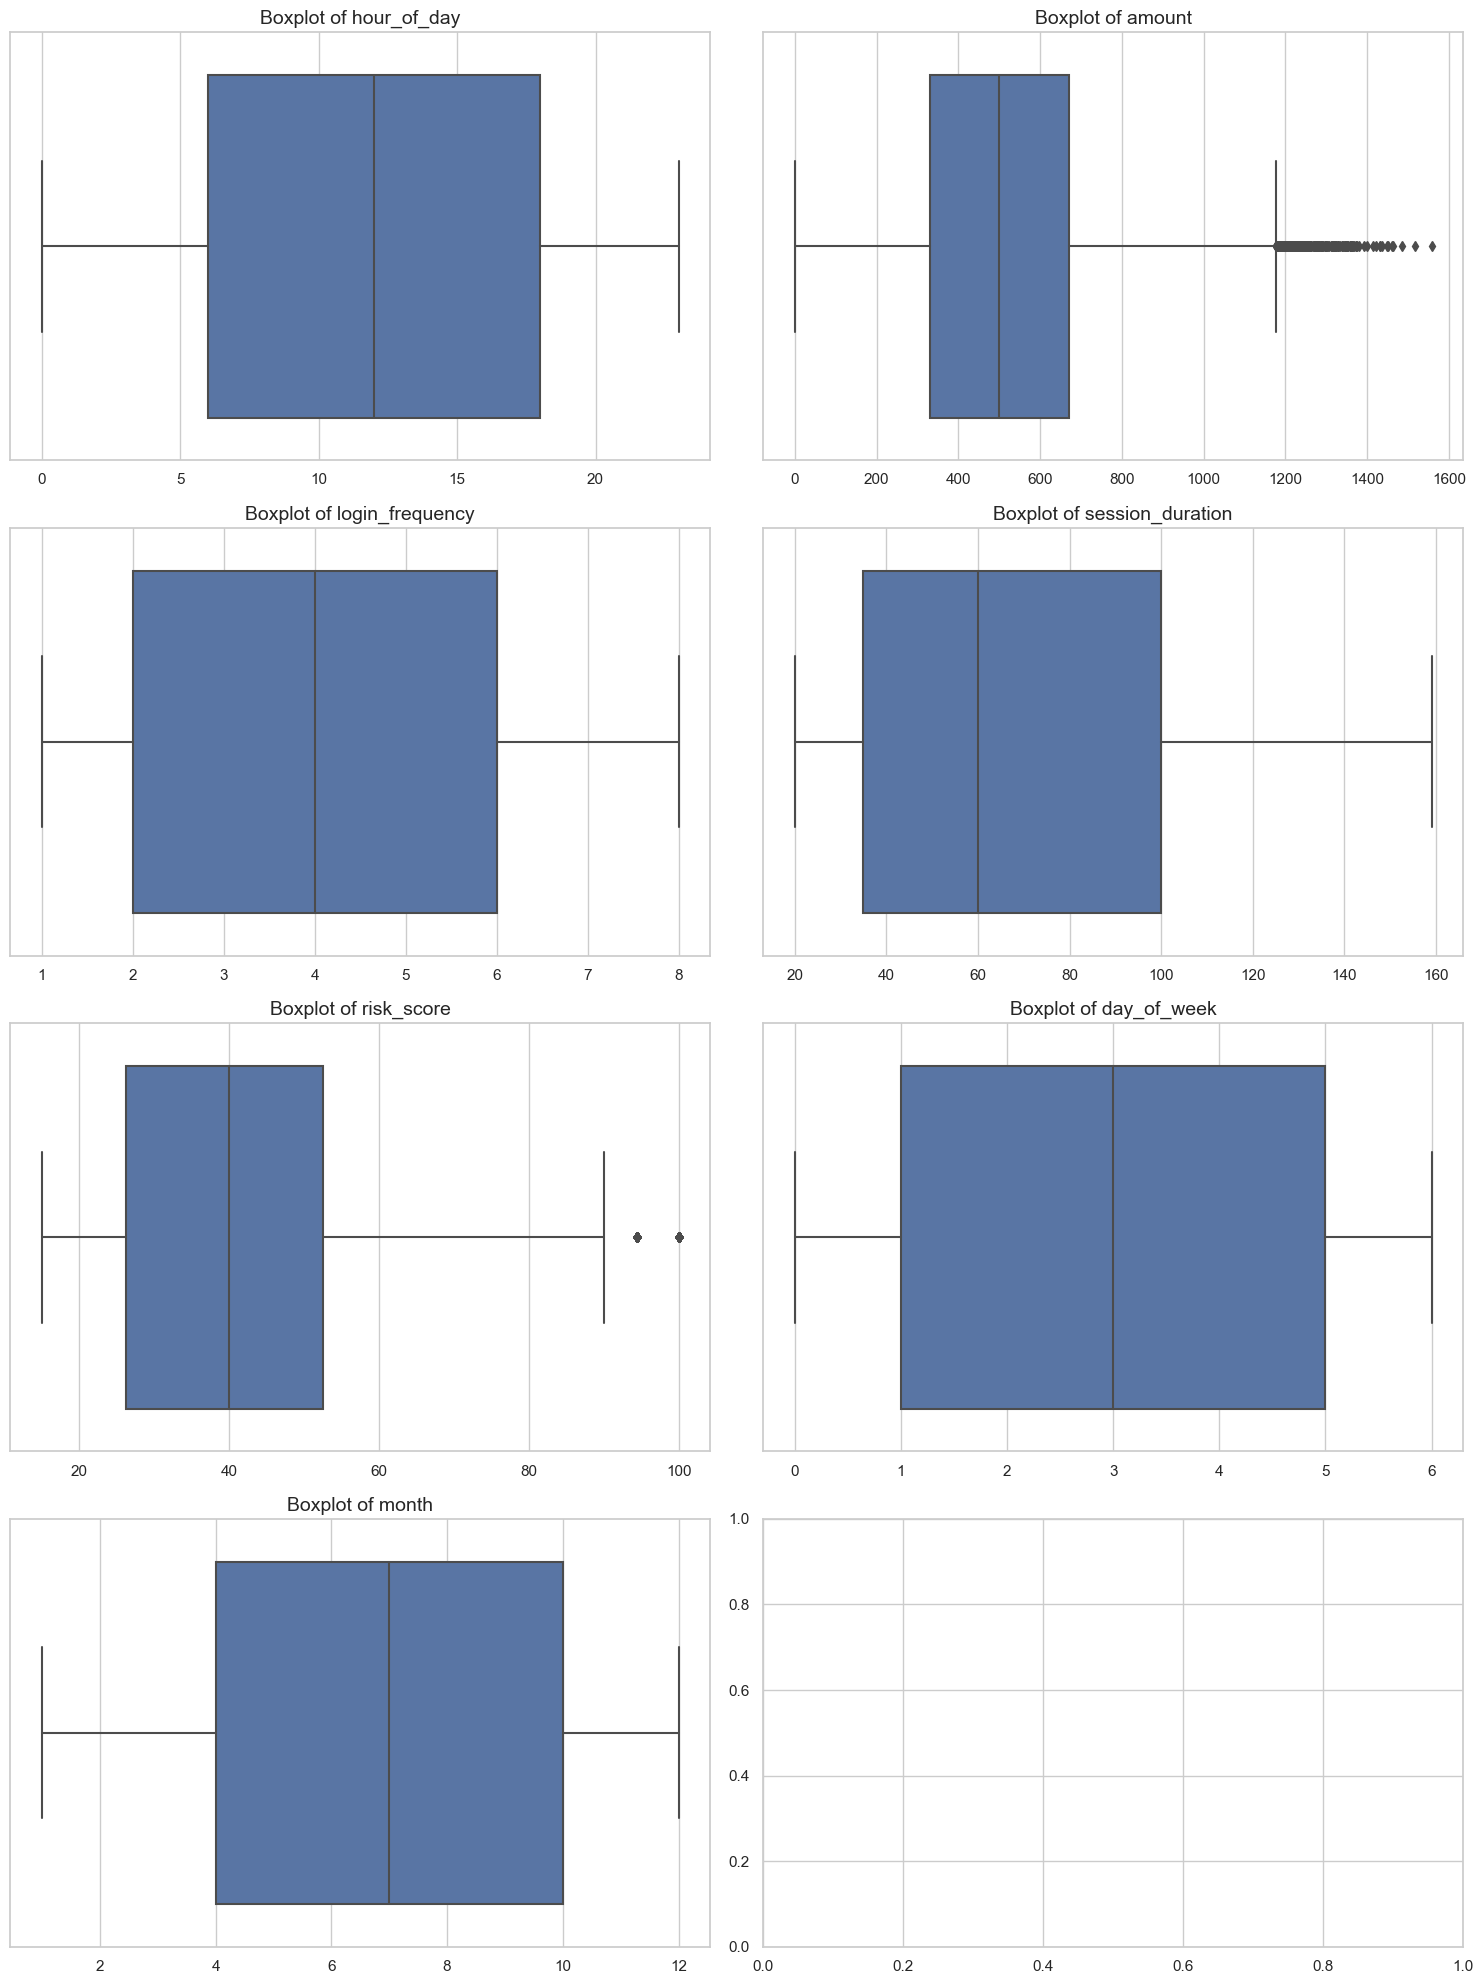

In [29]:
# Setting up the aesthetics for the plots
sns.set(style="whitegrid")

# Define the numerical columns for which to create boxplots
numerical_columns = ['hour_of_day', 'amount', 'login_frequency', 'session_duration', 
                     'risk_score', 'day_of_week', 'month']

# Creating a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting boxplots for each numerical feature
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout()
plt.show()

- **Hour of Day**: Distribution is fairly uniform across all hours, indicating transactions occur at all times.
- **Amount**: There are numerous outliers, suggesting some transactions involve significantly larger amounts than typical.
- **Login Frequency**: Also shows outliers; some users might be logging in much more frequently than others.
- **Session Duration**: There are outliers, with some sessions being much longer than average.
- **Risk Score**: Contains a few outliers on the higher end, which might correspond to higher-risk transactions.
- **Day of Week** and **Month**: These are categorical in nature (despite being encoded numerically) and don't necessarily show 'outliers' but rather the distribution of transactions across days and months.

### 2.5.4 Distributions <a id="distributions"></a>

We'll now visualize the distributions of the features in the dataset. We can use histograms for continuous variables and bar plots for categorical variables. This will give us insights into the shape of the distributions, skewness, and presence of distinct categories.

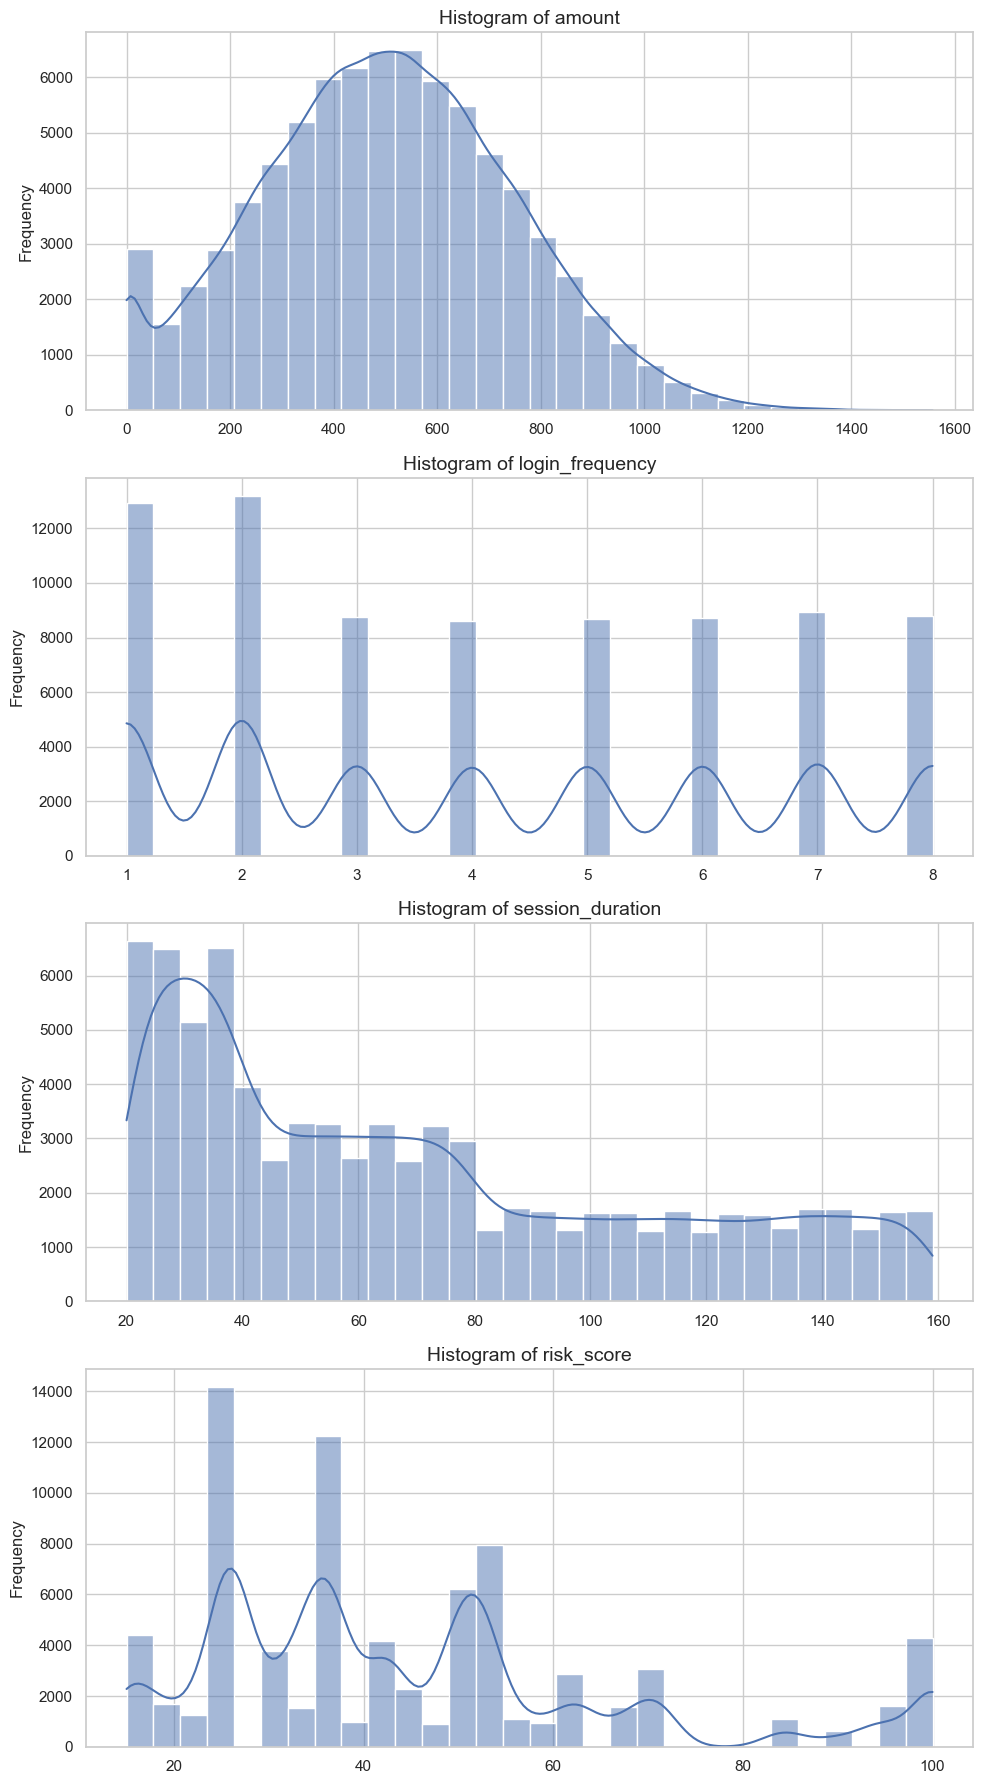

In [33]:
# Defining the continuous numerical columns
continuous_columns = ['amount', 'login_frequency', 'session_duration', 'risk_score']

# Creating a figure with subplots for histograms
fig, axes = plt.subplots(nrows=len(continuous_columns), figsize=(10, 18))

# Plotting histograms for each continuous numerical feature
for i, col in enumerate(continuous_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

- **Amount**: The distribution is right-skewed, indicating that most transactions involve smaller amounts, with a few transactions involving significantly larger amounts.
- **Login Frequency**: Also right-skewed, suggesting most users log in a few times, with fewer users logging in very frequently.
- **Session Duration**: This feature is right-skewed as well, showing that most sessions are short, with fewer instances of very long sessions.
- **Risk Score**: Exhibits a right-skewness with a peak at lower scores, indicating most transactions are considered low risk.

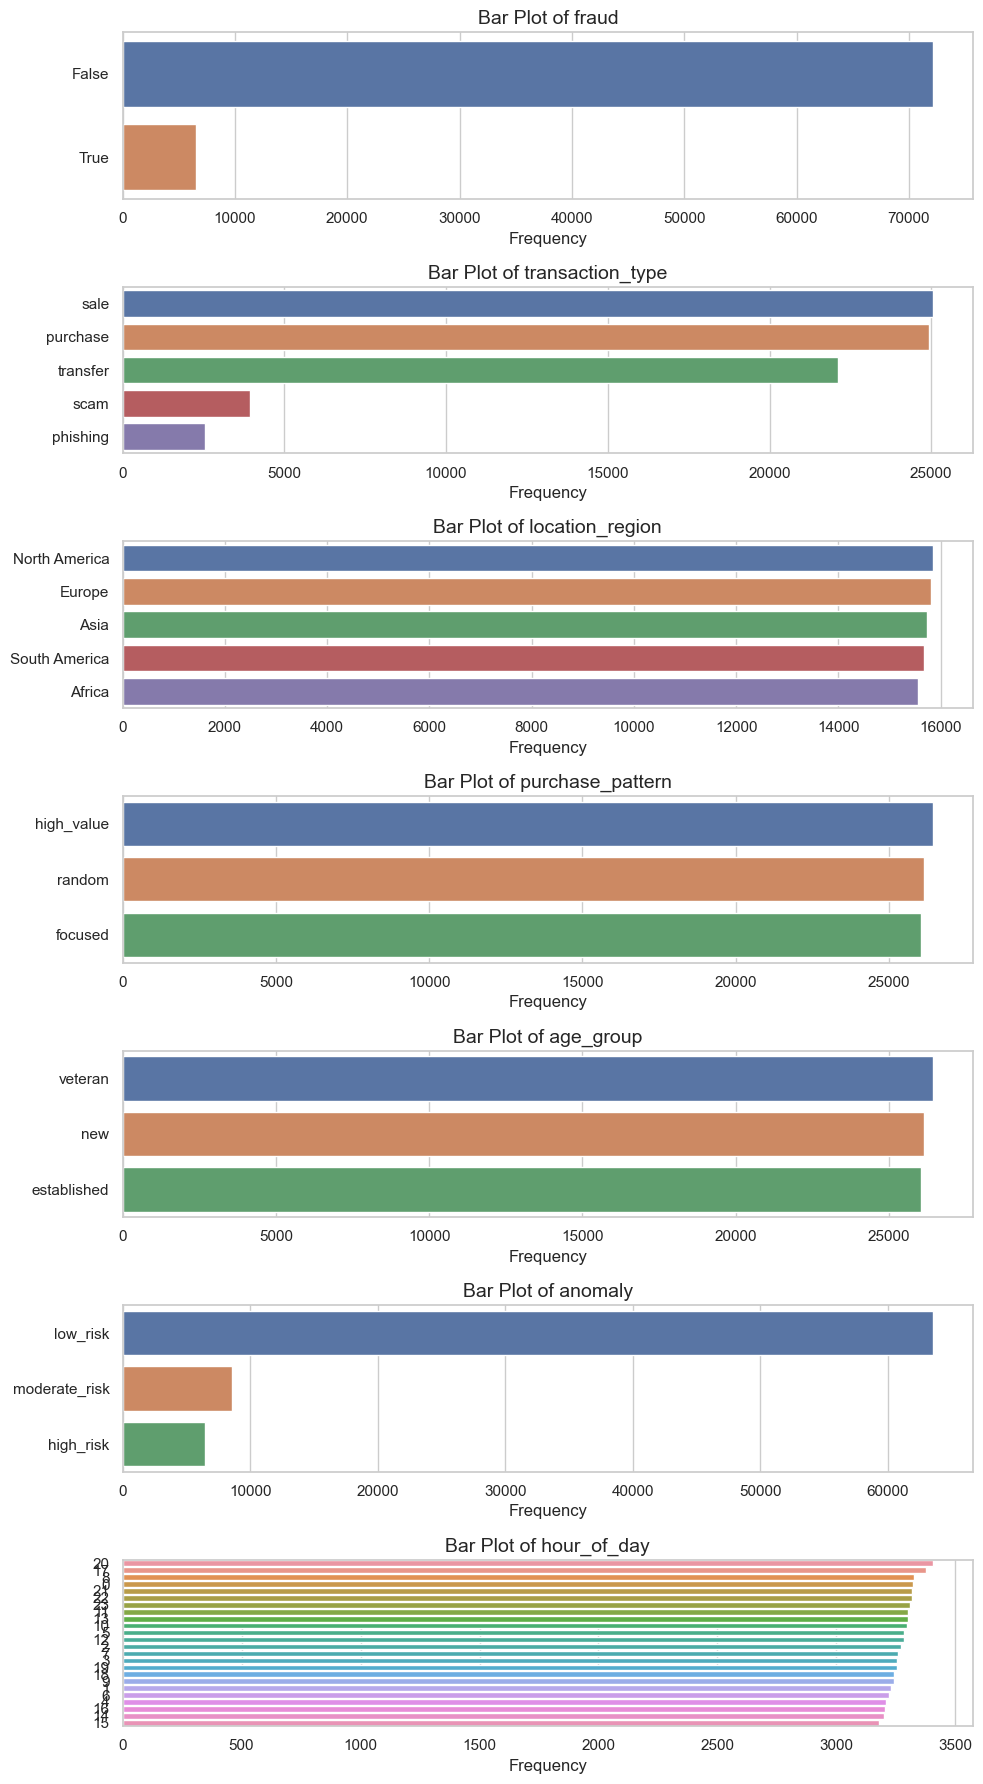

In [35]:
# Defining the categorical columns
categorical_columns = ['fraud', 'transaction_type', 'location_region', 'purchase_pattern', 
                       'age_group', 'anomaly', 'hour_of_day']

# Creating a figure with subplots for bar plots
fig, axes = plt.subplots(nrows=len(categorical_columns), figsize=(10, 18))

# Plotting bar plots for each categorical feature
for i, col in enumerate(categorical_columns):
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Bar Plot of {col}', fontsize=14)
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

- **Transaction Type**: We have just a small minority of transactions showing as either scams or phishing, which is representative of real-world data. The remaining 90%+ of transaction types are legitimate (sales, purchases, and transfers), and these three transaction types are well balanced between each other. 
- **Location Region**: Displays the distribution of transactions across different geographical regions, which can indicate regional trends or potential areas of concern for fraud. Transactions are well balanced across continents, with North America having the most and Africa having the least. 
- **Purchase Pattern**: Highlights the variety of purchase behaviors, which are also incredibly well-balanced. 
- **Age Group**: Shows the distribution of transactions among different age groups, potentially important for tailoring fraud detection strategies to specific demographic groups. All age groups are incredibly well-balanced. 
- **Anomaly**: The graph shows that low risk transactions are by far the most dominant, with moderate risk and high risk transactions being the small minority. This seems representative of real-world data. 
- **Hour of Day**: Highlights the distribution of transactions occur with relative frequency across all hours of the day. 

### 2.5.5 Feature Engineering <a id="feature_engineering"></a>

We've already engineered a couple of features from the timestamp column: day of week and month. Let's engineer a few additional features that could prove useful. 

Let's see if there are any sending addresses equal to receiving addresses, which could indicate a fraudulent transaction. 

In [11]:
(df.sending_address == df.receiving_address).sum()

87

Sure enough, there are 87 sending addresses equal to receiving addresses, so we can engineer a binary feature to flag these occurrences. 

In [41]:
# Creating 'Is Weekend' feature
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)

# Creating 'Time of Day' feature based on hour_of_day
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

df['time_of_day'] = df['hour_of_day'].apply(categorize_time_of_day)

# Creating 'Amount per Login' feature
df['amount_per_login'] = df['amount'] / df['login_frequency']

# Creating 'Duration per Login' feature
df['duration_per_login'] = df['session_duration'] / df['login_frequency']

# Creating 'Same Address Flag' feature
df['same_address_flag'] = (df['sending_address'] == df['receiving_address']).astype(int)

# Display the first few rows of the updated dataframe to check the new features
df[['is_weekend', 'time_of_day', 'amount_per_login', 'duration_per_login', 'same_address_flag']].head()

,is_weekend,time_of_day,amount_per_login,duration_per_login,same_address_flag
0,0,afternoon,265.649735,16.000000,0
1,0,evening,0.002000,12.200000,0
2,0,afternoon,259.399130,24.666667,0
3,0,morning,37.604795,13.875000,0
4,0,afternoon,129.261557,16.666667,0


- **Is Weekend**: Determines if the transaction date (day_of_week column) falls on a weekend (Saturday=5, Sunday=6).
- **Time of Day**: Categorizes the hour_of_day into different time periods like morning, afternoon, evening, and night.
- **Amount Per Login**: Calculates the ratio of the transaction amount to the number of logins to identify potentially suspicious transactions.
- **Duration Per Login**: Computes the average session duration per login, which could help in spotting unusual activities. 
- **Same Address Flag**: Creates a flag to indicate whether the sending and receiving addresses are the same, which might be indicative of fraudulent behavior.

## 2.6 Visualizations  <a id="visualizations"></a>

### 2.6.1 Fraud Instances by Categories <a id="fraud_by_category"></a>

Let's visualize fraud instances by different categories to see if any category in particular stands out. 

<Figure size 1400x5000 with 0 Axes>

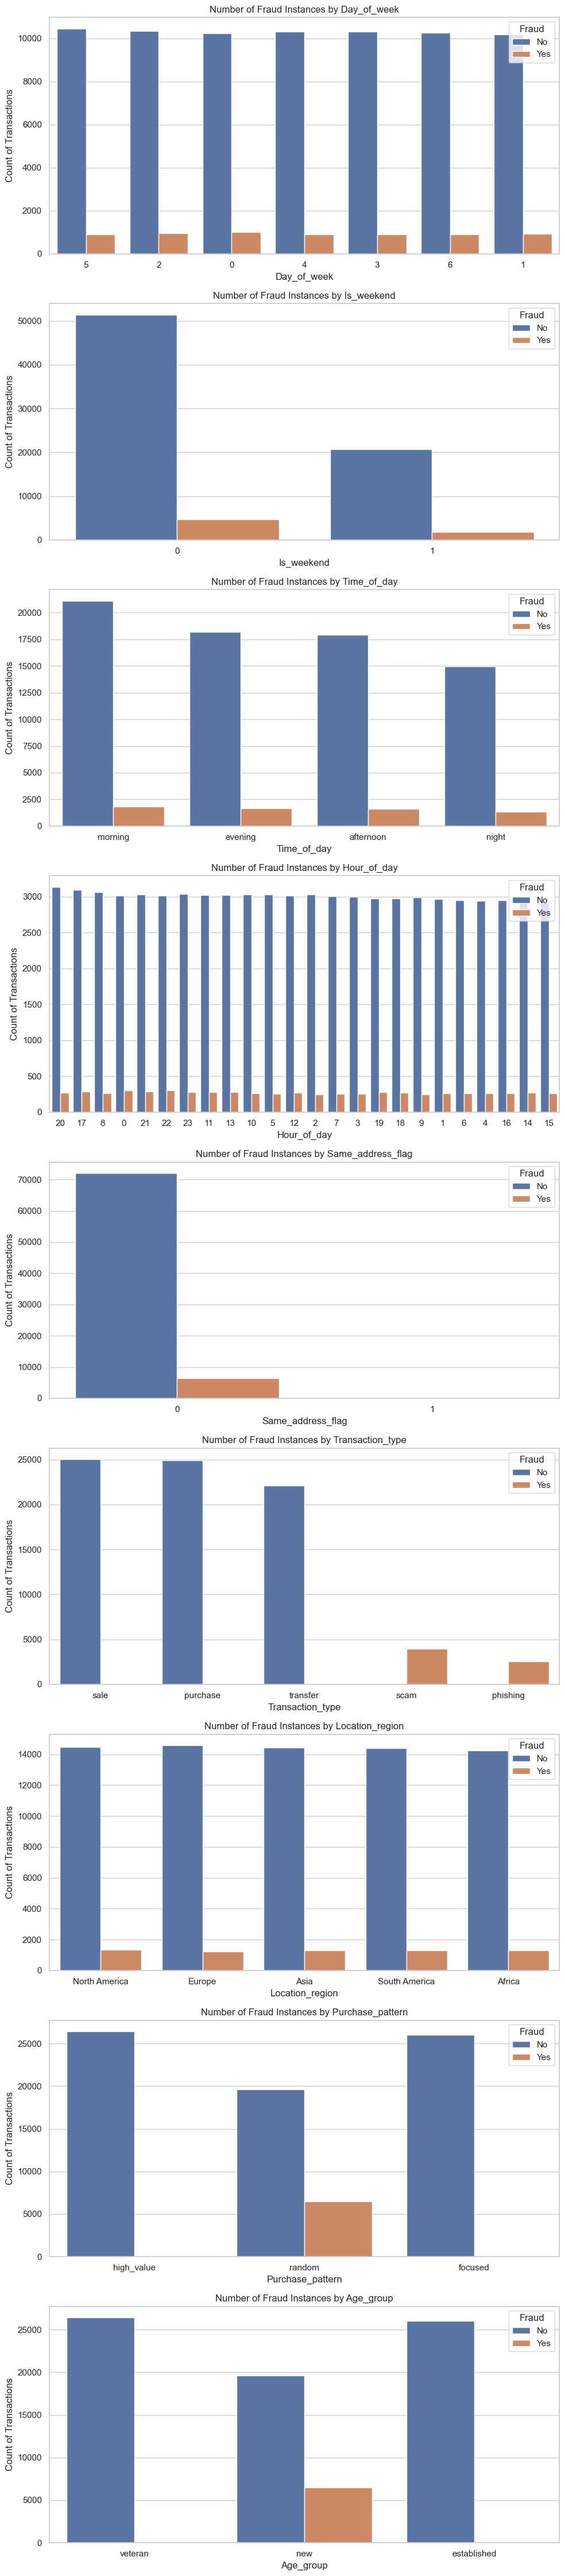

In [38]:
# Setting the size of all figures
plt.figure(figsize=(14, 50))

# Plotting setup
features = ['day_of_week', 'is_weekend', 'time_of_day', 'hour_of_day',
            'same_address_flag', 'transaction_type', 'location_region', 'purchase_pattern', 'age_group'
            ]
n_features = len(features)
fig, axes = plt.subplots(nrows=n_features, figsize=(10, 5 * n_features))

for i, feature in enumerate(features):
    # Create a count plot for each feature
    sns.countplot(x=feature, data=df, hue='fraud', ax=axes[i], order=df[feature].value_counts().index)
    axes[i].set_title(f'Number of Fraud Instances by {feature.capitalize()}')
    axes[i].set_xlabel(f'{feature.capitalize()}')
    axes[i].set_ylabel('Count of Transactions')
    axes[i].legend(title='Fraud', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

**Key takeaways** from the above bar charts: 

- **There are no meaningful differences in fraud instances by day of the week, time of day, or specific hour of the day**, although it's clear that most transactions in the metaverse occur in the mornings and the least transactions occur at night. 
- It's clear that transactions having sending address matching the receiving address doesn't correspond to fraud at all, so this debunks my initial theory that it would. 
- For Geographic Location, the number of both non-fraudulent and fraudulent transactions appears to be pretty uniform across all continents. 
- **Purchase Pattern and Age Group**: This is where things get interesting. 
    - **Of the three purchase patterns, the only one with fraud is the random purchase pattern**. This indicates that the random purchase pattern may be more indicative of fraud than other types such as "high_value" or "focused". This makes sense for a few reasons: 
        - High value transactions involve significantly larger monetary amounts compared to the typical transactions, and thus could be more scrutinized for fraud as they represent larger financial risks.
        - The "focused" category could refer to transactions that consistently involve specific types of goods or services, or transactions that occur in a regular, predictable manner. This might indicate a customer with specific shopping habits or preferences, and predictability is less likely to be associated with fraud. 
        - *"Random" transactions might show no clear pattern in terms of timing, amount, or the goods/services involved. This could be seen in sporadic purchases that are unpredictable, which might be flagged for further review since unpredictable transaction patterns can sometimes indicate fraudulent activity.*
    - **Of the three age groups, the only one with fraud is "new"**. This indicates that fraudsters are more likely to be new to the Metaverse based on their activity history, and unlikely to be established or veterans in the Metaverse. 

### 2.6.2 Pair Plot of Numerical Features by Fraud Status <a id="pair_plot"></a>

/Users/joshuabe/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


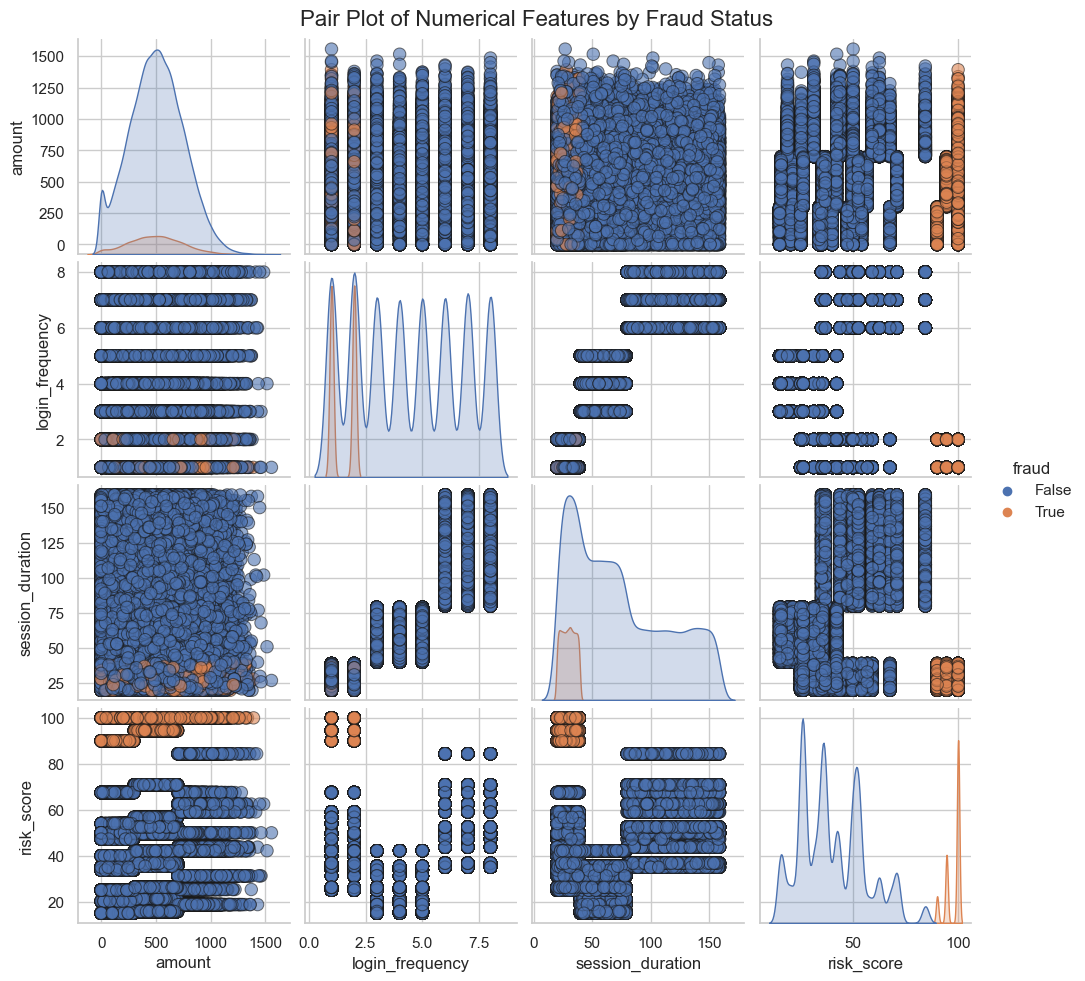

In [43]:
# Filter to a few numerical features
numerical_features = ['amount', 'login_frequency', 'session_duration', 'risk_score'] 

# Pair plot segmented by 'fraud' status
sns.pairplot(df[numerical_features + ['fraud']], hue='fraud', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Fraud Status', size=16)
plt.subplots_adjust(top=0.95)
plt.show()

This pair plot provides a detailed visualization of the relationships between several numerical features (amount, login_frequency, session_duration, risk_score) segmented by fraud status (True for fraud, False for not fraud). Here are some insights: 

- **Amount**: The distribution for fraudulent transactions (orange) shows that fraud tends to occur at higher transaction amounts compared to non-fraudulent transactions (blue), which are more evenly distributed across lower amounts. The increased occurrence of fraudulent activities at higher amounts might be because the potential gains are more substantial, making them a more attractive target for fraudulent behavior.
- **Login Frequency**: Transactions from users with lower login frequencies (1-2) have noticeably higher instances of fraud. In fact, there are no visible fraud transactions from users with login frequencies greater than 2. 
- **Session Duration**: Fraudulent transactions tend to have shorter session durations, with a peak at lower values, whereas non-fraudulent transactions are spread across a wider range of session durations.
- **Risk Score**: The risk score for fraudulent transactions is always higher, as indicated by the distribution concentrated toward higher scores, while non-fraudulent transactions are distributed across a broader range of lower scores. This is not surprising, since risk score and fraud are directly related. 

### 2.6.3 Density Plots of Numerical Features by Fraud Status <a id="density_plots"></a>

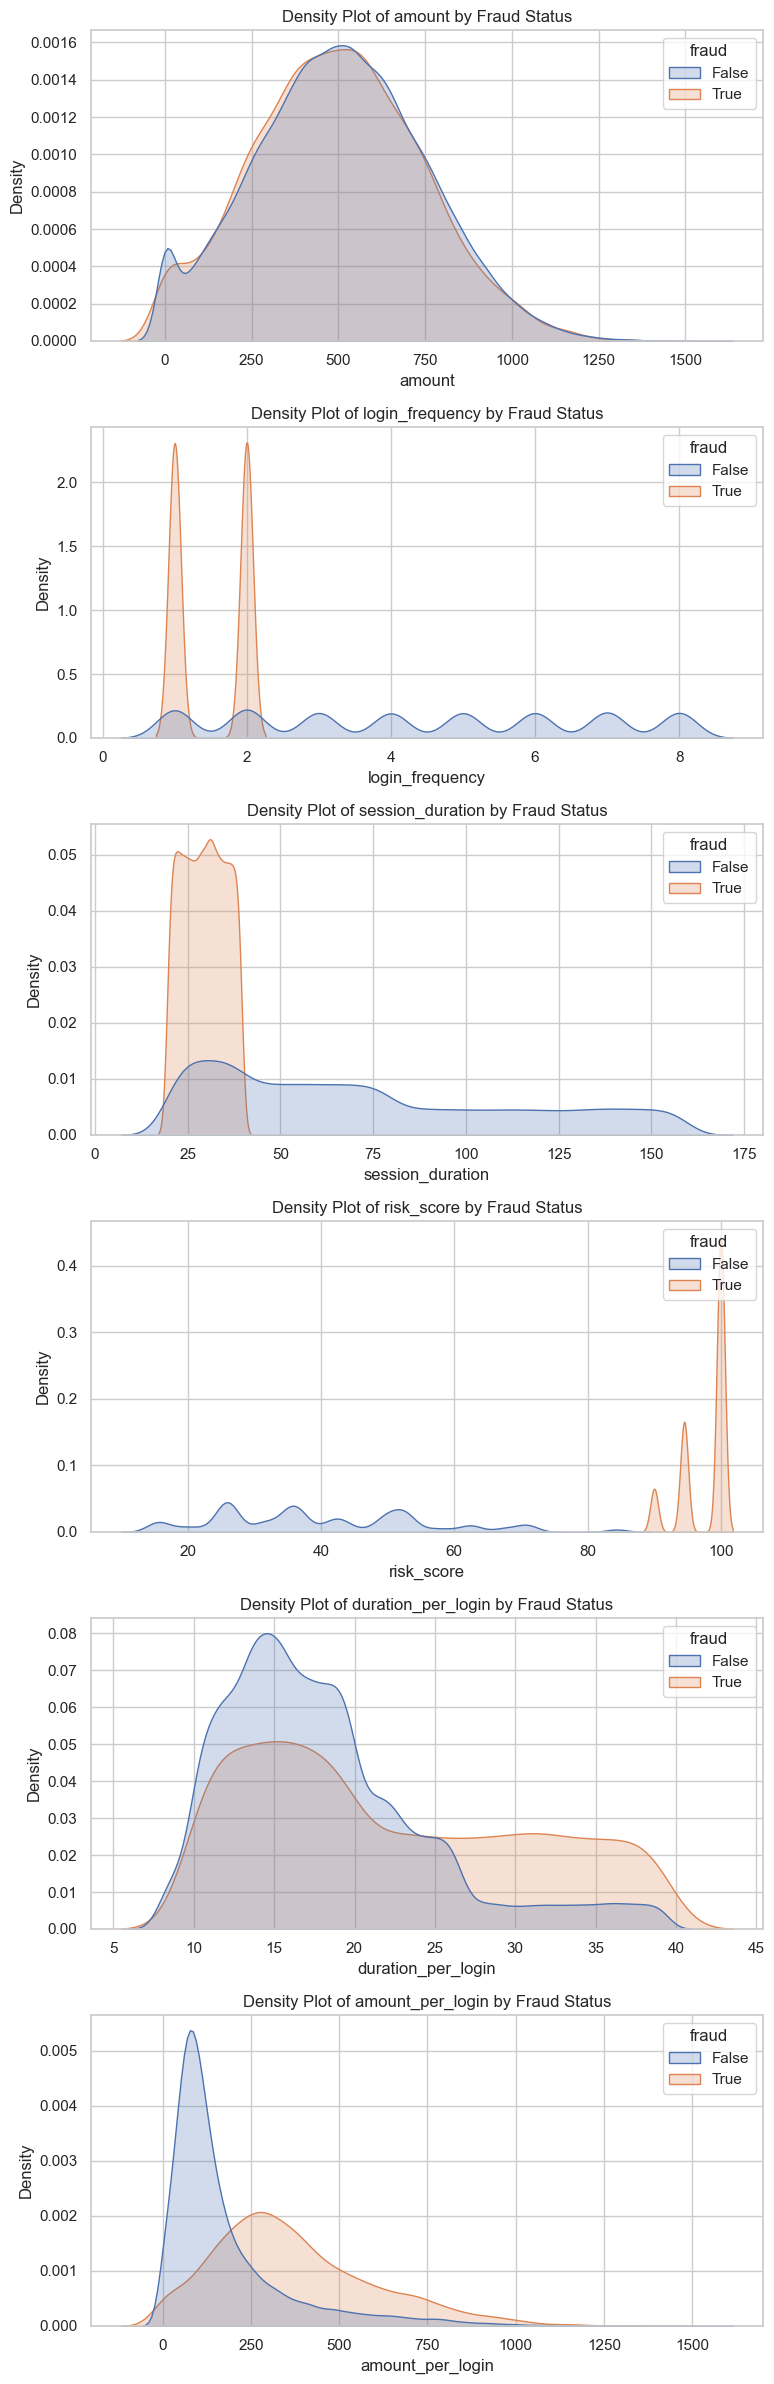

In [44]:
# Define numerical features including additional engineered features
numerical_features2 = ['amount', 'login_frequency', 'session_duration', 'risk_score', 
                     'duration_per_login', 'amount_per_login'] 

# Density Plot
fig, axes = plt.subplots(len(numerical_features2), 1, figsize=(8, 4 * len(numerical_features2)))

for i, feature in enumerate(numerical_features2):
    sns.kdeplot(data=df, x=feature, hue="fraud", fill=True, common_norm=False, ax=axes[i])
    axes[i].set_title(f'Density Plot of {feature} by Fraud Status')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

Takeaways from the density plots: 

- **Amount by Fraud Status**: There is significant overlap in the amounts between fraudulent and non-fraudulent transactions, highlighting that fraudsters often attempt to mimic typical transaction behaviors to avoid detection.
- **Login Frequency by Fraud Status**: The non-fraud distribution shows a pattern of smaller peaks at specific frequencies, likely indicating common login behaviors among users. The fraud distribution shows two clear peaks, perhaps suggesting specific abnormal patterns in login behaviors that are associated with fraudulent activities. 
- **Session Duration by Fraud Status**: The non-fraud distribution shows a broad peak around 25-50 minutes, indicating a common range of session durations for legitimate transactions. The fraud distribution has a narrower peak around the same duration as the most common non-fraudulent transactions, but the density quickly falls off, suggesting that fraudulent sessions might be shorter and more consistent in duration.
- **Risk Score by Fraud Status**: All the fraud cases fall between 90-100 Risk Score, another indication we should drop one of these redundant variables during preprocessing. 
- **Duration Per Login by Fraud Status**: The non-fraud distribution displays a broader distribution with a peak around 10-15 minutes per login. This might indicate a typical user behavior in session time relative to their login frequency. The fraud distribution is flatter and shifted towards slightly higher durations per login, which could suggest that fraudulent sessions take a longer time than normal to complete when looked at on a per login basis. 
- **Amount Per Login by Fraud Status**: The non-fraud distribution shows a peak at a very low amount per login, suggesting that regular users might have many logins relative to the amount transacted, indicating frequent but small transactions. The fraud distribution is much flatter with a lower peak, suggesting either larger amounts transacted per login or fewer logins for the amount transacted, which could be indicative of attempts to maximize the transaction value in fewer logins.

### 2.6.4 Feature Correlation Heatmap <a id="heatmap"></a>

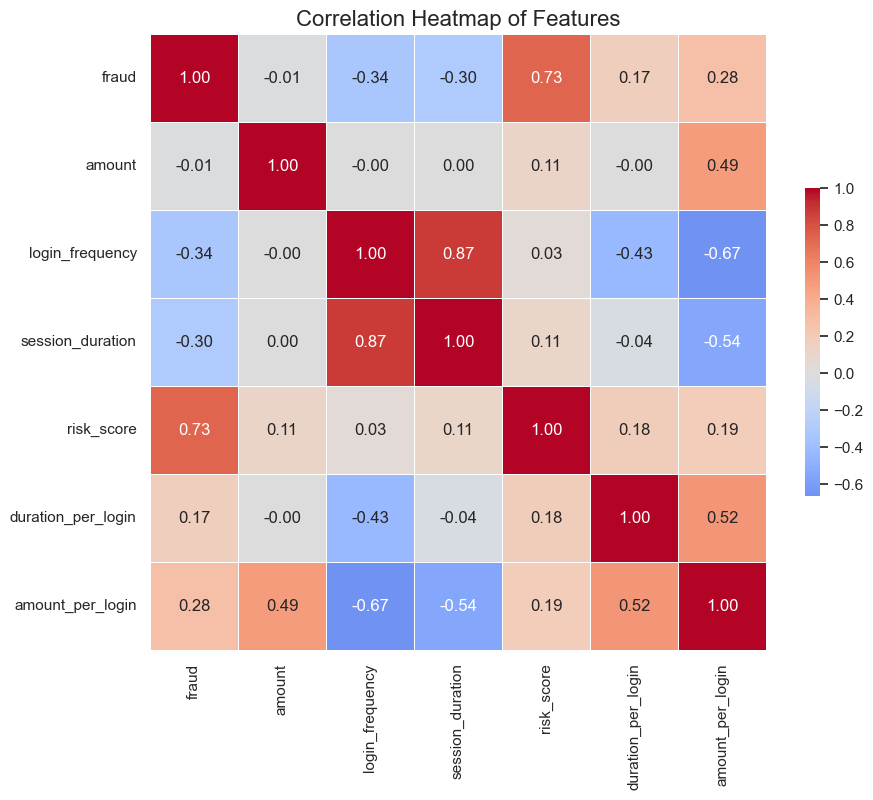

In [45]:
# Selecting the numerical features including the new ones
features = ['fraud', 'amount', 'login_frequency', 'session_duration', 'risk_score', 
            'duration_per_login', 'amount_per_login']

# Calculating the correlation matrix
corr_matrix = df[features].corr()

# Setting up the matplotlib figure
plt.figure(figsize=(10, 8))

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Adding title
plt.title('Correlation Heatmap of Features', size=16)

# Show plot
plt.show()


Takeaways from the correlation heatmap: 

- **Risk Score has the strongest positive correlation with fraud (0.73), but this is unsurprising since they're directly related.** Again, we'll ignore this for now. 
- **Login Frequency (-0.34) with Fraud and Session Duration (-0.30) with Fraud**: Both show moderate negative correlations with fraud, implying that lower login frequencies as well as lower session durations are associated with fraud, but there tends to be a slightly higher duration per login for fraudulent transactions. So fraudsters login less frequently, and thus their cumulative session durations are lower than average, but they have longer session times per each individual login. 
- **Amount Per Login with Fraud (0.28)**: Amount Per Login shows a moderate positive correlation with fraud, indicating that larger but less frequent transactions are associated with fraudulent behavior. 
- **Login Frequency and Session Duration (0.87)**: A very high positive correlation suggests that transactions with more frequent logins tend to have longer session durations. This relationship is intuitive as more active users will naturally have longer cumulative session times.
- **Duration Per Login and Amount per Login (0.52)**: These two variables have a moderate positive correlation, suggesting that longer durations per login are associated with higher amounts being transacted per login, which could imply more substantial transactions taking longer to complete.
- **Amount per Login and Login Frequency (-0.67)**: A strong negative correlation indicates that as the frequency of logins increases, the amount transacted per login tends to decrease. This might reflect a user behavior where frequent logins are associated with smaller, routine transactions.

## 2.7 Summary <a id="summary"></a>

**Explored the Data**: I began the EDA portion of this project by doing some initial exploration. This included generating summary statistics, figuring out which redundant columns to eventually drop, checking for outliers, examining distributions, and engineering a few key features (Is Weekend Time of Day, Amount Per Login, Duration Per Login, Same Address Flag). I also uncovered some insights with a number of helpful visualizations listed below. 
- **Fraud Instances by Categories**: 
    - **Of the three purchase patterns, the only one with fraud is the random purchase pattern**. This indicates that the random purchase pattern may be more indicative of fraud than other types such as "high_value" or "focused". 
    - **Of the three age groups, the only one with fraud is "new"**. This indicates that fraudsters are more likely to be new to the Metaverse based on their activity history, and unlikely to be established or veterans in the Metaverse. 
- **Pair Plot**: Fraud seems to be more prevalent at higher transaction amounts than at lower amounts, although it occurs across a broad range. The increased occurrence of fraudulent activities at higher amounts might be because the potential gains are more substantial, making them a more attractive target for fraudulent behavior. 
- **Density Plots**: The density plots provide insight into how fraudulent transactions may differ from legitimate ones in terms of amount, login frequency, session duration, and their ratios per login. These differences can guide the development of features or rules in a fraud detection system to better identify potential fraudulent activities based on deviations from the typical patterns observed in non-fraudulent transactions.
- **Correlation Heatmap**: the biggest takeaway is that **larger but less frequent transactions could potentially be a red flag for fraud detection systems**, as these types of transactions show correlations to fraud. 


In [49]:
# Save the DataFrame to a CSV file
df.to_csv('/Users/joshuabe/Downloads/Capstone 3 - Metaverse Fraud Prediction/metaverse_transactions_dataset_cleaned_explored.csv', index=False)